In [333]:
#Importing the Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# EXPLORATORY DATA ANALYSIS

In [337]:
#Exploring the Boston Datasets
boston_calender=pd.read_csv('calendar.csv')
boston_listings=pd.read_csv('listings.csv')
boston_reviews=pd.read_csv('reviews.csv')

In [306]:
boston_calender.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [307]:
#1.Room Availability (Month Wise)

#Data Preprocessing
#Removing the Duplicate Rows
boston_calender=boston_calender.drop_duplicates()
#Converting the datatype Date column into date format 
boston_calender['date']=pd.to_datetime(boston_calender['date'])

In [308]:
#Converting the Available Column into boolean type
#t --> True
#f --> False
boston_calender['available']=boston_calender['available'].replace(to_replace='t',value=True)
boston_calender['available']=boston_calender['available'].replace(to_replace='f',value=False)

In [309]:
#Month Wise Availability
#Separating the Dataset based on availability
boston_calender_available=boston_calender[boston_calender['available']==True]
boston_calender_not_available=boston_calender[boston_calender['available']==False]

In [310]:
boston_calender_available.head()

,listing_id,date,available,price
365,3075044,2017-08-22,True,$65.00
366,3075044,2017-08-21,True,$65.00
367,3075044,2017-08-20,True,$65.00
368,3075044,2017-08-19,True,$75.00
369,3075044,2017-08-18,True,$75.00


In [311]:
boston_calender_not_available.head()

,listing_id,date,available,price
0,12147973,2017-09-05,False,NaN
1,12147973,2017-09-04,False,NaN
2,12147973,2017-09-03,False,NaN
3,12147973,2017-09-02,False,NaN
4,12147973,2017-09-01,False,NaN


<AxesSubplot:title={'center':'Date vs Availability'}, xlabel='Months', ylabel='Availability Count'>

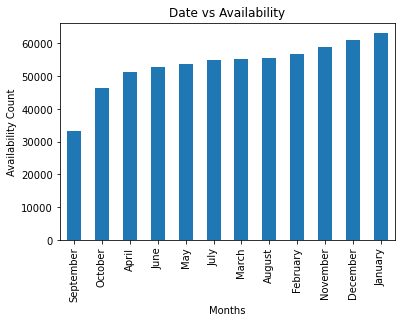

In [312]:
#Month Wise Availability
boston_calender_available.groupby(boston_calender_available['date'].dt.strftime('%B'))['available'].count().sort_values().plot(kind='bar',ylabel='Availability Count',xlabel='Months',title='Date vs Availability')

<AxesSubplot:title={'center':'Date vs Non-Availability'}, xlabel='Months', ylabel='Non-Availability Count'>

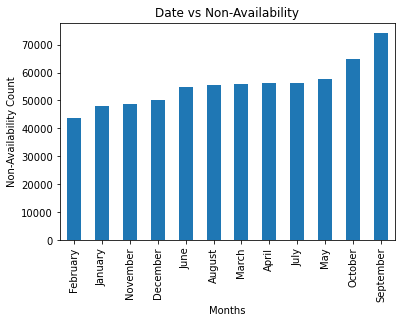

In [313]:
#Month Wise Availability
boston_calender_not_available.groupby(boston_calender_not_available['date'].dt.strftime('%B'))['available'].count().sort_values().plot(kind='bar',ylabel='Non-Availability Count',xlabel='Months',title='Date vs Non-Availability')

**Question1: Which time of the year is the peak tourist season?**

**CONCLUSION:**

_From the above barplot we can see that the month of October and September are the peak tourist season._

In [314]:
#Question2: How price of a room is corelated with other attributes?
boston_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [315]:
#Preprocessing
#Counting the NA Values (Column Wise)
boston_listings.isna().sum().sort_values(ascending=False)


has_availability                3585
license                         3585
neighbourhood_group_cleansed    3585
jurisdiction_names              3585
square_feet                     3529
                                ... 
is_location_exact                  0
room_type                          0
accommodates                       0
bed_type                           0
country                            0
Length: 95, dtype: int64

In [342]:
def price_cleansing(dataframe,col):
    """
    Function which will remove the Dollar Sign & Typecasting the Price Column into Floating Type
    
    Parameters:
    dataframe:  DataFrame containing the price attribute
    cols: Column containing the Price Values
    `
    Returns:
    dataframe:Returns a dataframe with price column transformer to floating type
    """
    agg_val=[]
    for val in dataframe[col]:
        agg_val.append(float(val[1:].replace(',','')))
    dataframe[col]=agg_val
    return dataframe

In [343]:
help(price_cleansing)

Help on function price_cleansing in module __main__:

price_cleansing(dataframe, col)
    Function which will remove the Dollar Sign & Typecasting the Price Column into Floating Type
    
    Parameters:
    dataframe:  DataFrame containing the price attribute
    cols: Column containing the Price Values
    `
    Returns:
    dataframe:Returns a dataframe with price column transformer to floating type



In [338]:
#Calling the price_cleansing function to transform the Price column
boston_listings=price_cleansing(boston_listings,'price')
#Checking whether the values are correct or not
boston_listings['price'].head()

0    250.0
1     65.0
2     65.0
3     75.0
4     79.0
Name: price, dtype: float64

In [331]:
#Finding the correlation values between price and other attributes using corr() 
boston_listings.corr()['price'].sort_values(ascending=False)[1:].head(6)

square_feet        0.447795
accommodates       0.437756
bedrooms           0.385298
beds               0.370013
bathrooms          0.248234
guests_included    0.211806
Name: price, dtype: float64

In [332]:
boston_listings[['square_feet','accommodates','bedrooms','beds','bathrooms','guests_included']].isna().sum()

square_feet        3529
accommodates          0
bedrooms             10
beds                  9
bathrooms            14
guests_included       0
dtype: int64

_It seems there were multiple NA values in square_feet attributes because of which we cannot consider this for further Analysis_

<AxesSubplot:xlabel='attributes', ylabel='Correlation Value'>

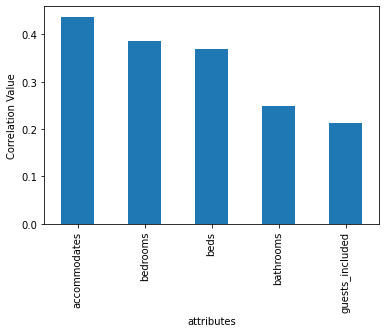

In [339]:
corr_value_price=boston_listings.corr()['price'].sort_values(ascending=False)[2:].head(5)
corr_value_price.plot(kind='bar',xlabel='attributes',ylabel='Correlation Value')

**Question2: How price of a room is corelated with other attributes?**

**CONCLUSION**:

_The variables such as 'accommodates','bedrooms','beds','bathrooms','guests_included' are strongly correlated with Price
which means these attributes strongly define the price of a airbnb property._

In [132]:
#Question3: Which street is most expensive?

In [340]:
boston_listings[['id','street','city','market','price']].head()

,id,street,city,market,price
0,12147973,"Birch Street, Boston, MA 02131, United States",Boston,Boston,250.0
1,3075044,"Pinehurst Street, Boston, MA 02131, United States",Boston,Boston,65.0
2,6976,"Ardale St., Boston, MA 02131, United States",Boston,Boston,65.0
3,1436513,"Boston, MA, United States",Boston,Boston,75.0
4,7651065,"Durnell Avenue, Boston, MA 02131, United States",Boston,Boston,79.0


In [348]:
def street_cleansing(dataframe,col):
    """
    Function which will split the street column and derive only the street name
    
    Parameters:
    dataframe:  DataFrame containing the Street attribute
    cols: Column containing the Street Column Values
    `
    Returns:
    dataframe:Returns a dataframe with Street Column containing only the street name
    """
    agg_val=[]
    for val in dataframe[col]:
        agg_val.append(val.split(',')[0])
    
    dataframe[col]=agg_val
    return dataframe

In [349]:
help(street_cleansing)

Help on function street_cleansing in module __main__:

street_cleansing(dataframe, col)
    Function which will split the street column and derive only the street name
    
    Parameters:
    dataframe:  DataFrame containing the Street attribute
    cols: Column containing the Street Column Values
    `
    Returns:
    dataframe:Returns a dataframe with Street Column containing only the street name



In [350]:
#Data Preprocessing
#Extracting the Street Names by street cleansing function
df=boston_listings[['id','street','city','market','price']]
df=street_cleansing(df,'street')
df.head()

,id,street,city,market,price
0,12147973,Birch Street,Boston,Boston,250.0
1,3075044,Pinehurst Street,Boston,Boston,65.0
2,6976,Ardale St.,Boston,Boston,65.0
3,1436513,Boston,Boston,Boston,75.0
4,7651065,Durnell Avenue,Boston,Boston,79.0


In [351]:
#Total Row Count
print('The shape of the dataset is',df.shape)
#NA count
print(df.isna().sum())

The shape of the dataset is (3585, 5)
id         0
street     0
city       2
market    14
price      0
dtype: int64


In [352]:
#Since the street contains 0 Null Values, there is no need to drop any rows.
df.head()

,id,street,city,market,price
0,12147973,Birch Street,Boston,Boston,250.0
1,3075044,Pinehurst Street,Boston,Boston,65.0
2,6976,Ardale St.,Boston,Boston,65.0
3,1436513,Boston,Boston,Boston,75.0
4,7651065,Durnell Avenue,Boston,Boston,79.0


<AxesSubplot:title={'center':'Most Expensive Streets'}, xlabel='Street', ylabel='Average Price'>

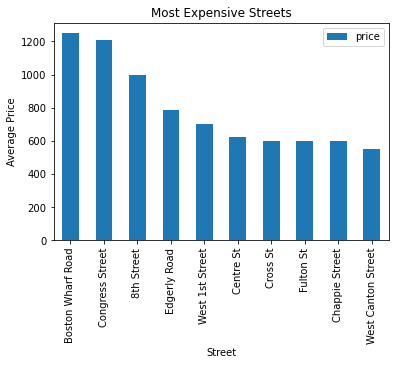

In [353]:
#Top 10 Most Expensive Streets
df[['street','price']].groupby('street').mean().sort_values('price',ascending=False).apply(np.floor).head(10).plot(kind='bar',xlabel='Street',ylabel='Average Price',title='Most Expensive Streets')

**Question3: Which streets accomodates the most expensive AirBnb?**

**CONCLUSION**:

_From the Above Bar plot we can clearly see that the Boston Wharf Road followed by Congress Street & 8th Street are the most expensive ones_

# PREDICTIVE ANALYSIS

In [355]:
#Predicting the Price of AirBnb
#Data Loading

boston_listings=pd.read_csv('listings.csv')
used_feature=['accommodates','bedrooms','bathrooms','beds','minimum_nights','maximum_nights','number_of_reviews','room_type','bed_type','guests_included','price']
df_bl=boston_listings[used_feature]
df_bl.isnull().sum()

accommodates          0
bedrooms             10
bathrooms            14
beds                  9
minimum_nights        0
maximum_nights        0
number_of_reviews     0
room_type             0
bed_type              0
guests_included       0
price                 0
dtype: int64

In [356]:
#Data CLeaning
#Removing the missing values as the null count is very low
df_bl=df_bl.dropna()
df_bl.isnull().sum()

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
room_type            0
bed_type             0
guests_included      0
price                0
dtype: int64

In [357]:
#Data Preprocessing
#Removing the Dollar Sign & Typecasting the Price Column into Floating Type by calling the price_cleansing()
df_bl=price_cleansing(df_bl,'price')

In [358]:
df_bl.head()

,accommodates,bedrooms,bathrooms,beds,minimum_nights,maximum_nights,number_of_reviews,room_type,bed_type,guests_included,price
0,4,2.0,1.5,3.0,2,1125,0,Entire home/apt,Real Bed,1,250.0
1,2,1.0,1.0,1.0,2,15,36,Private room,Real Bed,0,65.0
2,2,1.0,1.0,1.0,3,45,41,Private room,Real Bed,1,65.0
3,4,1.0,1.0,2.0,1,1125,1,Private room,Real Bed,2,75.0
4,2,1.0,1.5,2.0,2,31,29,Private room,Real Bed,1,79.0


In [359]:
#Handling Categorical Variables using pandas get_dummies library
# transform data
df_bl = pd.get_dummies(df_bl)

#Dividing the data into Training & Test Sets

train , test = train_test_split(df_bl, test_size = 0.3)
X_train = train.drop('price', axis=1)
y_train = train['price']

X_test = test.drop('price', axis = 1)
y_test = test['price']

#Creating a Scaler Object and Transforming the data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train= pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform (X_test))

In [360]:
#Checking the datatypes
df_bl.dtypes

accommodates                   int64
bedrooms                     float64
bathrooms                    float64
beds                         float64
minimum_nights                 int64
maximum_nights                 int64
number_of_reviews              int64
guests_included                int64
price                        float64
room_type_Entire home/apt      uint8
room_type_Private room         uint8
room_type_Shared room          uint8
bed_type_Airbed                uint8
bed_type_Couch                 uint8
bed_type_Futon                 uint8
bed_type_Pull-out Sofa         uint8
bed_type_Real Bed              uint8
dtype: object

In [361]:
#Function to Calculate the RMSE Values of a model
def rmse_value(y_test,val_preds):
    """Returns the RMSE Values of a model
    
    Parameters:
    y_test_val:  Response Variable Testing Data
    val_preds: Response Variable Predicted Data (using X_test)
    `
    Returns:
    rmse:Returns a floating data containing the rmse value
    
    """
    mse = mean_squared_error(y_test, val_preds)
    rmse = mse ** (1/2)
    
    return rmse
    

In [363]:
help(rmse_value)

Help on function rmse_value in module __main__:

rmse_value(y_test, val_preds)
    Returns the RMSE Values of a model
    
    Parameters:
    y_test_val:  Response Variable Testing Data
    val_preds: Response Variable Predicted Data (using X_test)
    `
    Returns:
    rmse:Returns a floating data containing the rmse value



In [364]:
#MODEL NAME: MULTILINEAR REGRESSION
# Create instance of the model, `LinearRegression` function from 
# Scikit-Learn and fit the model on the training data:

reg = LinearRegression()  
reg.fit(X_train, y_train) #training the algorithm

# Now that the model has been fit we can make predictions by calling 
# the predict command. We are making predictions on the testing set:

training_preds_reg = reg.predict(X_train)
val_preds_reg = reg.predict(X_test)


# Check the predictions against the actual values by using the MSE:
#Calling the RMSE_VALUE() 
print('RMSE of Multi Linear Regression Model:',rmse_value(y_test,val_preds_reg))

RMSE of Multi Linear Regression Model: 96.85966208529585


In [366]:
#MODEL NAME: RANDOMFOREST
rf = RandomForestRegressor(n_estimators=20, n_jobs=-1)
rf.fit(X_train, y_train)

training_preds_rf = rf.predict(X_train)
val_preds_rf = rf.predict(X_test)


# Check the predictions against the actual values by using the MSE metrics:
print('RMSE of RMSE of RandomForest Regressor Model:',rmse_value(y_test,val_preds_rf))

RMSE of RMSE of RandomForest Regressor Model: 106.93331587322709


In [367]:
#MODEL NAME: KNN
knn = KNeighborsRegressor(algorithm='brute')
knn.fit(X_train, y_train)

training_preds_knn = knn.predict(X_train)
val_preds_knn = knn.predict(X_test)
        
# Check the predictions against the actual values by using the MSE metrics:
print('RMSE of KNN Model:',rmse_value(y_test,val_preds_knn))

RMSE of KNN Model: 100.50920225445884


**Conclusion**

_Out of three models (multilinear Regression, Random Forest and KNN Regressor), the rmse value of Multi Linear Regression model is low. However the value is quite high, this model needs to be optimized further._